# 6.1

Напомним, что в наивном байесовском классификаторе класс определяется по следующей формуле:
$\DeclareMathOperator*{\argmax}{argmax}$
$$ y(x) = \argmax_{y} p(y) \prod_{k=1}^{n} P(x^{(k)} | y) $$

Так как $ p(y) = const $ и $ P(x^{(k)} | y ) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x^{(k)} - \mu_{yk})^2}{2 \sigma^2}} $, то
$\DeclareMathOperator*{\argmin}{argmin}$
$$ y(x) = \argmax_y e^{-\frac{1}{2 \sigma^2} \sum_{k=1}^n (x^{(k)} - \mu_{yk})^2}
        = \argmin_y \sum_{k=1}^n (x^{(k)} - \mu_{yk})^2
        = \argmin_y \sqrt{\sum_{k=1}^n (x^{(k)} - \mu_{yk})^2}
        = \argmin_y || x - \mu_y || $$

Утверждение доказано.

# 6.2

Заметим, что треугольный ROC-AUC равен $0.5$, если для нашего классификатора $ \frac{TPR}{FPR} = 1 $. 

Согласно условию, классификатор $a(x)=1$ с вероятностью $p$. Пусть доля $1$ в выборке равна $q$.

Тогда, очевидны следующие равенства: $ TP = p q $, $ TP + FN = q $, $ FP = p (1 - q) $, $ FP + TN = 1 - q $

Из того, что $ TPR = \frac{TP}{TP + FN} $, $ FPR = \frac{FP}{FP + TN} $ следует, что 
$ \frac{TPR}{FPR} = \frac{TP(FP + TN)}{(TP + FN)FP} = \frac{pq(1 - q)}{qp(1 - q)} = 1 $.

Утверждение доказано.

# 6.3

$ E_B = \min \{ P(1 | x), P(0 | x) \} $

$ E_N = P(y \neq y_n) $

Надо доказать, что $ E_N \geq \frac{1}{2} E_B $.

Заметим, что:
1. $ E_B \leq \frac{1}{2} $ (так как $ P(1 | x) + P(0 | x) = 1 $), и, следовательно, $ 1 - E_B \geq \frac{1}{2} $
2. $ P(c | x_n) \xrightarrow[|| x_n - x || \to 0]{} P(c | x) $

$ E_N = P(y \neq y_n)
      = P(y = 0) P(0 | x) P(1 | x_n) + P(y = 1) P(1 | x) P(0 | x_n)
      \xrightarrow[ || x_n -x || \to 0 ]{} P(0 | x) P(1 | x)
      = E_B (1 - E_B) \geq \frac{1}{2} E_B $

Утверждение доказано.

# 6.4

Пусть в листе находятся $k$ значений: $y_1, ..., y_k$, каждое выпадает с вероятностью $\frac{1}{k}$, как указано в условии.

Тогда математическое ожидание при ответе средним значением
$ E_{avg} = \frac{1}{k} \sum \limits_{i=1}^k (y_i - \bar{y})^2 $ ,
где $ \bar{y} = \frac{1}{k} \sum \limits_{i=1}^k y_i $ .

При ответе случайным значением, если $y_i$ - целевое значение, а $y_j$ - предсказанное значение, матожидание ошибки 
$ E_{rand} = \frac{1}{k} \sum \limits_{i=1}^k \frac{1}{k} \sum \limits_{j=1}^k (y_i - y_j)^2 $ .

Давайте докажем, что $ (y_i - \bar{y})^2 \leq \frac{1}{k} \sum \limits_{j=1}^k (y_i - y_j)^2 $
для любого $y_i \in \{y_1, ..., y_k\}$ .

Из этого сразу будет следовать, что $ E_{avg} \leq E_{rand} $, а значит выгоднее отвечать средним значением.

Перепишем неравенство $ (y_i - \bar{y})^2 \leq \frac{1}{k} \sum \limits_{j=1}^k (y_i - y_j)^2 $ следующим образом:
$ \big( \frac{1}{k} \sum \limits_{j=1}^k (y_i - y_j) \big) ^2 \leq \frac{1}{k} \sum \limits_{j=1}^k (y_i - y_j)^2 $ .
В таком виде очевидна идентичность данного неравенства неравенству Йенсена: $ f(E(X)) \leq E(f(X)) $,
где $ X = \big\{ X_j = (y_i - y_j) \big\} $, а $f(x) = x^2$ - выпуклая функция. Значит, неравенство тождественно верно.

Задача решена, выгоднее отвечать средним значением.

# 6.5

При построении дерева по MSE/MAE критерию, наилучшим разбиением является то, которое минимизирует неоднородность таргета $y$ в дочерних нодах, а на распределение $X$ в дочерних нодах она не смотрит. Следовательно в листья попадают наборы со следующими характеристиками: близкие значения $y$ и (возможно) далеко отстоящие значения $X$. Очевидно, что на таких наборах линейная регрессия или не нужна, или не даст хороших результатов.

Чтобы получить пользу от линейной регрессии, надо сделать так, чтобы в листья попадали объекты, у которых признаки близки в пространстве признаков. При таком разбиении, в листьях будут находиться объекты из маленькой окрестности, и, следовательно, линейная регрессия даст нам линеаризацию $y$ в этой окрестности (это будет хорошо работать, если $y$ есть дифференцируемая (а значит и линеаризуемая) функция от $X$).

Добиться этого несложно, достаточно в критерии разбиения:
$ G(i, t) = \frac{|L|}{|Q|} H(L) + \frac{|R|}{|Q|} H(R) $ заменить
$ H(S) = \frac{1}{|S|} \sum \limits_{i} (y_i - \bar{y})^2 $ на некоторую функцию близости признаков.

Если признаки являются векторами $ (x^j) = (x^{1}, ..., x^{m} ) $,
то старую функцию $ H(S) $ можно заменить на следующую функцию:
$$ HX(S) = \frac{1}{m} \sum \limits_{j=1}^m \frac{1}{|S|} \sum \limits_{i} (x_i^j - \bar{x^j})^2 $$ .

Далее приведен пример с улучшением точности (ошибка MSE cнизилась в 50 раз) дерева решений в результате применения вышеназванного критерия разбиения, который распределяет объекты по листам на основе близости их признаков.

In [1]:
import random
import warnings
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# mse split criterion
# each index can produce only 10 possible bounds => split complexity ~ (1 + log)(X.shape[0]) * X.shape[1] * 10
class DecisionTree(object):
    def __init__(self, error_function, leaf_predictor_class, max_depth=100):
        self.error_function = error_function
        self.leaf_predictor_class = leaf_predictor_class
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.root = self.Node(self, X, y)
    
    def predict(self, X):
        return np.asarray(list(self.root.predict(x) for x in X))
    
    class Node(object):
        def __init__(self, dt, X, y, depth=0):
            self.is_leaf = (depth >= dt.max_depth) or (X.shape[0] == 1)
            if self.is_leaf:
                self.y = dt.leaf_predictor_class()
                self.y.fit(X, y)
            else:
                self.ind = None
                self.bound = None
                self.error = None
                for ind, bounds in self.__compute_inds_and_bounds(X, y):
                    for bound in bounds:
                        cur_error = dt.error_function(X, y, ind, bound)
                        if (self.error is None) or (cur_error < self.error):
                            self.ind = ind
                            self.bound = bound
                            self.error = cur_error
                if self.error is None:
                    self.is_leaf = True
                    self.y = dt.leaf_predictor_class()
                    self.y.fit(X, y)
                else:
                    X_left, y_left, X_right, y_right = self.__split_by_ind_and_bound(X, y, self.ind, self.bound)
                    self.left  = dt.Node(dt, X_left , y_left , depth + 1)
                    self.right = dt.Node(dt, X_right, y_right, depth + 1)
                
        def predict(self, x):
            if self.is_leaf:
                return self.y.predict(x)
            else:
                child = self.left if x[self.ind] <= self.bound else self.right
                return child.predict(x)
        
        def __compute_inds_and_bounds(self, X, y):
            for ind in range(X.shape[1]):
                levels = np.unique(X[:, ind])
                step = max(1, levels.shape[0] // 10)
                yield ind, levels[:-1:step]
        
        def __split_by_ind_and_bound(self, X, y, ind, bound):
            left_inds = X[:, ind] <= bound
            right_inds = np.logical_not(left_inds)
            return X[left_inds], y[left_inds], X[right_inds], y[right_inds]


In [4]:
def error_function_group_by_y(X, y, ind, bound):
    inds = X[:, ind] <= bound
    left_y  = y[inds]
    right_y = y[np.logical_not(inds)]
    return left_y.shape[0] * np.var(left_y) + right_y.shape[0] * np.var(right_y)

In [5]:
def error_function_group_by_x(X, y, ind, bound):
    inds = X[:, ind] <= bound
    left_X  = X[inds]
    right_X = X[np.logical_not(inds)]
    return left_X.shape[0] * np.mean(np.var(left_X, axis=0)) + right_X.shape[0] * np.mean(np.var(right_X, axis=0))

In [6]:
class MeanPredictor(object):
    def fit(self, X, y):
        self.y = np.mean(y)
    
    def predict(self, x):
        return self.y

In [7]:
class RandomPredictor(object):
    def fit(self, X, y):
        self.y = list(y)
    
    def predict(self, x):
        return random.choice(y)

### Generate data

In [8]:
size = 100

In [9]:
X = np.linspace(-3, 3, size).reshape(size, 1)
y = np.sin(X).reshape(size,)

In [10]:
inds = np.asarray(list(range(size)))
train_inds = inds % 2 == 0
test_inds = inds % 2 == 1
X_train, y_train = X[train_inds], y[train_inds]
X_test , y_test  = X[test_inds ], y[test_inds ]

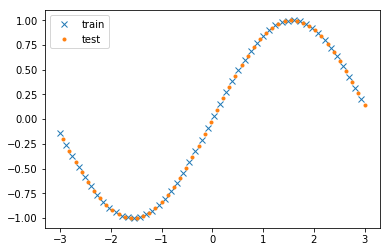

In [11]:
plt.plot(X_train, y_train, 'x')
plt.plot(X_test , y_test , '.')
plt.legend(['train', 'test'])
plt.show()

### results

In [12]:
out = []

warnings.filterwarnings('ignore')
for error_function in [error_function_group_by_y, error_function_group_by_x]:
    for leaf_predictor in [MeanPredictor, RandomPredictor, LinearRegression]:
        est = DecisionTree(error_function, leaf_predictor, max_depth=3)
        est.fit(X_train, y_train)
        mse_test  = mean_squared_error (y_test , est.predict(X_test ))
        mae_test  = mean_absolute_error(y_test , est.predict(X_test ))
        mse_train = mean_squared_error (y_train, est.predict(X_train))
        mae_train = mean_absolute_error(y_train, est.predict(X_train))
        out.append([error_function.__name__, leaf_predictor.__name__, mse_test, mae_test, mse_train, mae_train])
        
pd.DataFrame(out, columns=['error_function', 'leaf_predictor', 'mse_test_err', 'mae_test_err', 'mse_train_err', 'mae_train_err'])

,error_function,leaf_predictor,mse_test_err,mae_test_err,mse_train_err,mae_train_err
0,error_function_group_by_y,MeanPredictor,0.019639,0.116326,0.018369,0.113242
1,error_function_group_by_y,RandomPredictor,0.966171,0.942449,1.096272,0.898735
2,error_function_group_by_y,LinearRegression,0.013179,0.082053,0.012512,0.079051
3,error_function_group_by_x,MeanPredictor,0.022827,0.120253,0.021361,0.117521
4,error_function_group_by_x,RandomPredictor,1.198047,0.922211,1.211994,0.725536
5,error_function_group_by_x,LinearRegression,0.000352,0.014123,0.000252,0.012260


При таком разбиении, что близкие по признакам объекты попадают в один лист
ошибка от применения регрессии в листе уменьшилась в 50(!) раз по MSE и в 7 раз по MAE.

### Plot split bounds from tree nodes ( $node[x[ind] \leq bound] \to left, else \to right$ )

In [13]:
def plot_bounds(est, X_train, y_train):
    def collect_bounds(node):
        return [] if node.is_leaf else collect_bounds(node.left) + [node.bound] + collect_bounds(node.right)
    
    plt.plot(np.linspace(-3.14, 3.14, 100), np.sin(np.linspace(-3.14, 3.14, 100)))
    est.fit(X_train, y_train)
    x = collect_bounds(est.root)
    y = np.sin(x)
    plt.plot(x, y, 'xr')

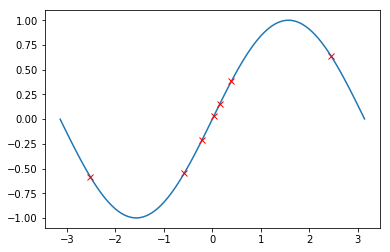

In [14]:
plot_bounds(DecisionTree(error_function_group_by_y, MeanPredictor, max_depth=3), X_train, y_train)

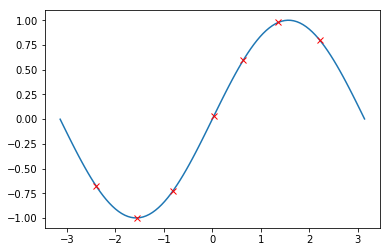

In [15]:
plot_bounds(DecisionTree(error_function_group_by_x, MeanPredictor, max_depth=3), X_train, y_train)